# Stability and absolute stability
$$
 \newcommand{d}{\,{\rm d}}
 \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
 \def\tn#1{{\mathbb{#1}}}
 \def\Real{{\rm\bf R}}
 \def\prtl{\partial}
$$
**Example**

Consider the numerical solution of the equation:
$$
y' = \lambda y,\quad y(0)=1,
$$
using explicit Euler's method. 

With the choice $\lambda=-10$ and $h=0.5$, the numerical solution is given by:
$$
  y_i = (1 + h\lambda) y_{i-1} = -4 y_{i-1}= (-4)^i
$$
Therefore, the numerical solution oscillates with an exponentially increasing error, while the exact solution is quickly decreasing exponential function. Here are the first few iterations of the method.


In [1]:
# convert PDF to PNG
from pdf2image import convert_from_path
def pdf_convert(f):
    images = convert_from_path(f, dpi=150)
    assert len(images) == 1 
    f_new = f.rstrip('pdf') + 'png'
    images[0].save(f_new, 'PNG')
for f in ['as_explicit_euler.pdf', 'as_implicit_euler.pdf', 'as_rk.pdf']:
    pdf_convert(f)

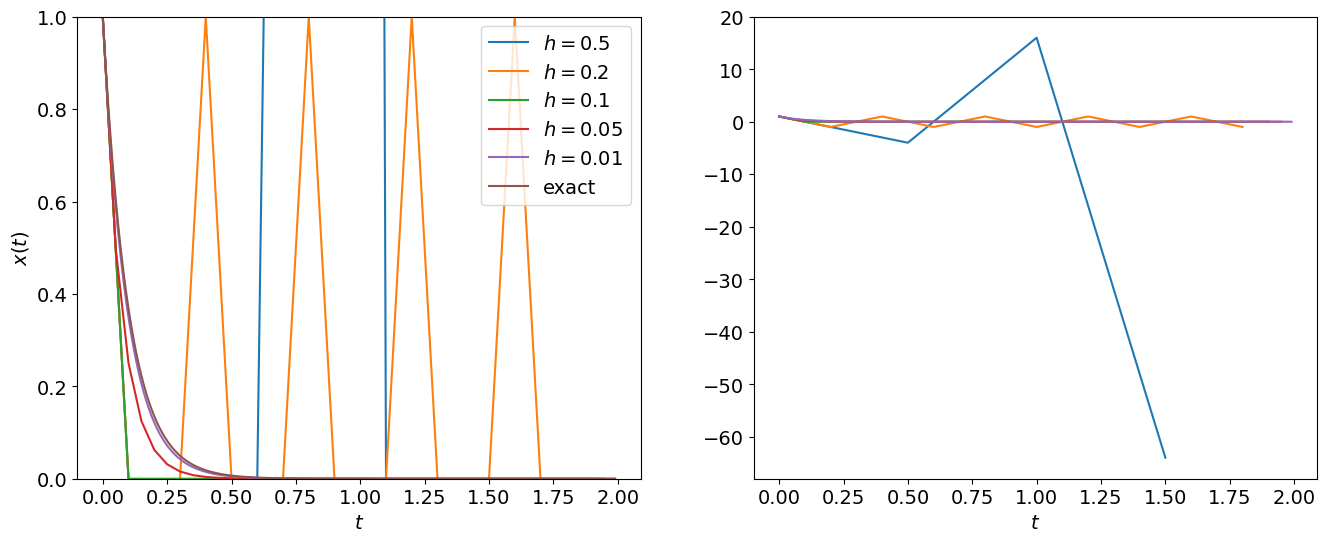

In [2]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

l = -10

def euler(y, h):
    return y *(1 + h * l)

def exact(t, t0, y0):
    return math.exp(l * (t - t0)) * y0
    
def solve(h, N, method):
    y0 = 1.0
    solution = [[0, 0, y0, 0, 0, y0]]
    y = y0
    for i in range(1, N):
        t = h * i
        yy = method(y, h)
        d = exact(t, h * (i-1), y) - yy
        e = exact(t, 0, y0) 
        g = e - yy
        solution.append([i,t,yy,d,g, e])
        y =yy
    return solution
    
def solve_to_time(h, T, method):
    return np.array(solve(h, int(T/h), method)).T

font = {'size'   : 14}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
for h in reversed([0.01, 0.05, 0.1, 0.2, 0.5]):  
        s = solve_to_time(h, 2.0, method=euler)
        ax[0].plot(s[1], s[2], label=f"$h = {h}$")
        ax[1].plot(s[1], s[2], label=f"$h = {h}$")

ax[0].plot(s[1], s[5], label="exact")
ax[0].set_ylim((0, 1.0))
ax[0].set_xlabel("$t$")
ax[1].set_xlabel("$t$")
ax[0].set_ylabel("$x(t)$")

ax[0].legend()
plt.show()

The exact solution converges quickly to zero, while the numerical solution shows exponentially increasing oscillations.

The demonstrated phenomenon is called *numerical instability* of the method. 


## Stability

Let us now introduce concept of stability of a numerical method:

**Definition**

A one-step numerical method is **stable** if there exist positive constants 
$\hat h$, $k$ such that for a numerical solution $\vc y_i$ of the problem with 
initial condition $\vc y_0$ and the numerical solution $\vc z_i$ of the problem 
with initial condition $\vc z_0 = \vc y_0 + \vc \delta_0$, the following holds 
$$
\max_{i} \|\vc y_i - \vc z_i\| \le k \delta,\qquad \text{for all }h\in(0,\hat h).
$$
whenever $\|\vc \delta_0\| < \delta$.

An important theoretical result is a Lax theorem, which roughly says:
$$
\text{stable} + \text{consistent} \Longrightarrow  \text{convergent}
$$

For the Euler method, we can estimate the difference of solutions as follows

\begin{align*}
  \|\vc\delta_i\| &= \vc y_i - \vc z_i \\ 
                  &\le \|\vc y_{i-1} - \vc z_{i-1}\| + h\|f(t_{i-1}, y_{i-1}) - f(t_{i-1}, z_{i-1}) \| \\
                  &\le \|\vc\delta_{i-1}\| (1 + hL)
\end{align*}

where we have used the Lipschitz condition for $f$ in the last inequality.

Iterating the inequality up to the initial condition, we get:
$$
  \|\vc\delta_i\| \le (1+hL)^i\|\vc\delta_0\| \le e^{hiL}\|{\vc\delta_0\| \le k\|\vc\delta_0\| 
$$
where $k = e^{LT}$ and $\|\vc\delta_0\| \le \delta$.

Therefore, explicit Euler is a stable method !!

So why doesn't it work in the last example? 
The definition of stability is problematic for two reasons:

1. It describes the deviation of two solutions only for small time steps $h \le \hat h$.
1. It allows arbitrary (even exponential) growth of the solution deviation.



## Absolute stability
**Definition.**

The method is called **absolutely stable** for a time step $h$, given ODE and time interval $[0, T]$,
if changing the initial condition $y_0$ by $\delta$ causes the numerical solution 
to change on the whole time interval by at most $\delta$:

$$
    \|\vc y(t) - \vc z(t)\| \le \|\vc y_0 - \vc z_0\|,\quad \text{for all }t\in [0, T]
$$


Absolute stability is usually investigated on a scalar linear equation with a complex parameter $\lambda\in \mathbb C$:

\begin{equation}
   y'(t) = \lambda y(t),\qquad y(0) =y_0.
\end{equation}

Let us investigate absolute stability for the explicit Euler method:
$$
    y_i = y_{i-1} + h \lambda y_{i-1} = (1+h\lambda)y_{i-1}
$$
then for the difference of solutions, we have:
$$
    \delta_i = y_i - z_i = (1+h\lambda)^i |\delta_0|.
$$

To have a bounded differential for any time $t = ih\le T$, we need $|1+h\lambda|\le 1$. 
The product $h\lambda$ is a complex number that must be in the unit circle centered at $-1+0i$.

<p align="center">
    <img src="as_explicit_euler.png" 
    alt="region of absolute stability explicit Euler" 
    style="width:500px;"/>
</p>

**Definition.**
The set $Z\subset \mathbb C$ for which $h\lambda\in \mathbb Z$ implies the absolute stability of the method
 is called the **region of absolute stability** of the method.


In the last example, the method should be absolutely stable for $h\lambda > -2$, which is equivalent to $h < 0.2$. 
That is what we have observed.




# Other motivation example

In the previous section, we saw that for some types of equations (with large eigenvalues), the explicit Euler method requires short time steps, which, however, can lead to a large round-off error. 

Consider the initial problem:

$$  
  y' = -\alpha (y-t^2) + 2t,\quad t>0,\ y(0)=1
$$

with exact solution

$$
   y(t)=e^{-\alpha t} + t^2.
$$




Now consider a large $\alpha$, e.g. $\alpha=100$. For $t$ close to $0$, 
the first term on the right-hand side dominates and the solution 
quickly decreases to zero as $e^{-\alpha t}$. 
As the solution approaches $t^2$, the second term dominates, and the solution grows as $y \sim t^2$.

Using the explicit Euler method for this problem requires a time step of $h < 2/\alpha$. 
Moreover, this condition must be satisfied
even on a time interval where the solution changes slowly. 

For comparison, consider the initial problem:
$$  
    x' = 2t, \quad t>0,\ x(0.5)=0.25
$$
Let us compare solution $x(t)$ with solution $y(t)$ for the initial condition $y(0.5) = 0.25$.

It can be seen that for the equation \eqref{eq:stiff_scalar} oscillations occur (due to violation of the stability condition) even when starting from a practically exact solution.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function y(t) = exp(-100t) + t^2
def y(t):
    return np.exp(-100*t) + t**2

# Create a range of t values from 0 to 0.1
t = np.linspace(0, 0.1, 400)

# Calculate y values
y_values = y(t)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, y_values, label='y(t) = exp(-100t) + t^2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot of y(t) = exp(-100t) + t^2')
plt.legend()
plt.grid(True)
plt.show()

TypeError: euler() takes 2 positional arguments but 3 were given

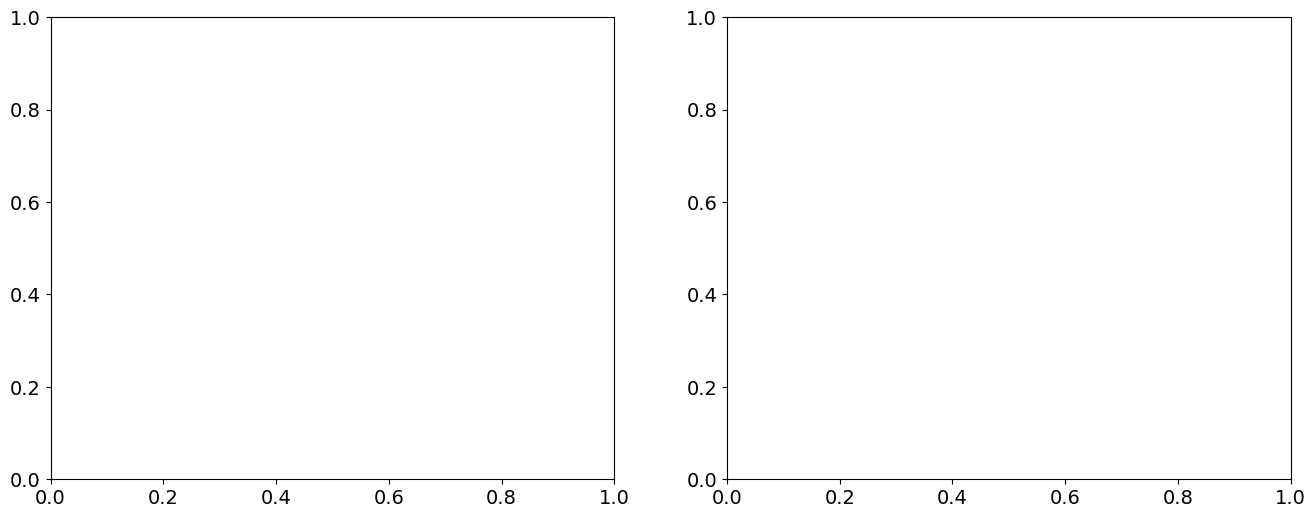

In [3]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

alpha = 100

def rhs(t, y):
    return -alpha*(y-t**2) + 2*t

def exact(t, t0, y0):
    return y0 * math.exp(-alpha*t) + t**2

def euler_explicit(t, y, h):
    return y  + h * rhs(t, y)

def euler_implicit(t, y, h):
    return y  + h * rhs(t, y)

    
def solve(h, N, method):
    y0 = 1.0
    solution = [[0, 0, y0, 0, 0, y0]]
    y = y0
    for i in range(1, N):
        t = h * i
        yy = method(t, y, h)
        d = exact(t, h * (i-1), y) - yy
        e = exact(t, 0, y0) 
        g = e - yy
        solution.append([i,t,yy,d,g, e])
        y =yy
    return solution
    
def solve_to_time(h, T, method):
    return np.array(solve(h, int(T/h), method)).T

font = {'size'   : 14}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
for h in reversed([0.01, 0.05, 0.1, 0.2, 0.5]):  
        s = solve_to_time(h, 2.0, method=euler)
        ax[0].plot(s[1], s[2], label=f"$h = {h}$")
        ax[1].plot(s[1], s[2], label=f"$h = {h}$")

ax[0].plot(s[1], s[5], label="exact")
ax[0].set_ylim((0, 1.0))
ax[0].set_xlabel("$t$")
ax[1].set_xlabel("$t$")
ax[0].set_ylabel("$x(t)$")

ax[0].legend()
plt.show()

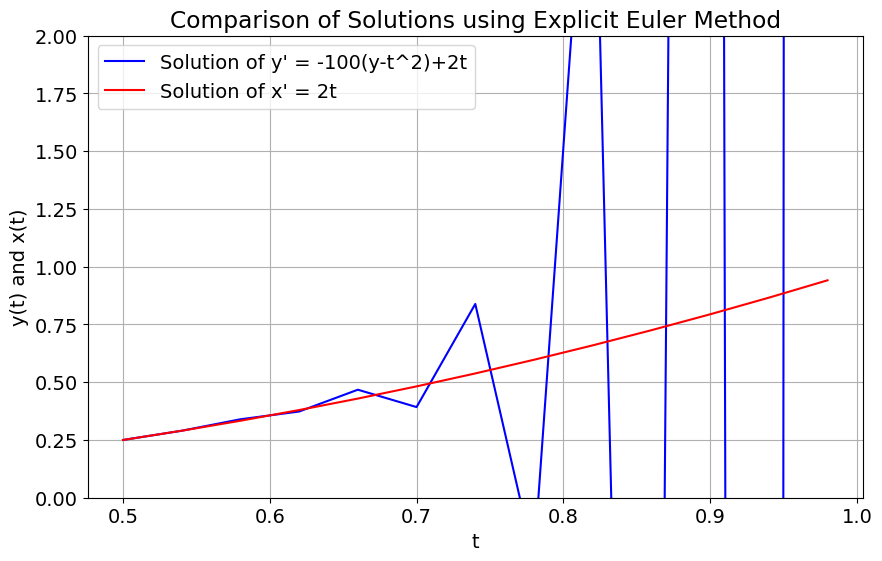

In [7]:
# Define the ODE functions and the Explicit Euler method
def ode1(y, t):
    return -100 * (y - t**2) + 2*t

def ode2(x, t):
    return 2*t

def explicit_euler(ode, y0, t0, t_end, step):
    times = np.arange(t0, t_end, step)
    y_values = [y0]
    for t in times[:-1]:
        y_values.append(y_values[-1] + step * ode(y_values[-1], t))
    return times, np.array(y_values)

# Initial conditions and parameters
y0 = 0.25
x0 = 0.25
t0 = 0.5
t_end = 1
step = 0.04

# Solve the ODEs using the Explicit Euler method
t_values, y_euler = explicit_euler(ode1, y0, t0, t_end, step)
_, x_euler = explicit_euler(ode2, x0, t0, t_end, step)

# Plotting the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_euler, label="Solution of y' = -100(y-t^2)+2t", color='blue')
plt.plot(t_values, x_euler, label="Solution of x' = 2t", color='red')
plt.xlabel('t')
plt.ylabel('y(t) and x(t)')
plt.ylim((0,2))
plt.title("Comparison of Solutions using Explicit Euler Method")
plt.legend()
plt.grid(True)
plt.show()


## Stiff problems
A problem is called **stiff** on an interval $I$ if the time step required for absolute stability is less than the time step required to meet the desired accuracy.

For a system of equations with right-hand side $\vc f(t, \vc x)$, the stiffness is given by the ratio between
the absolute value of the largest $\lambda_{max}$ and the smallest $\lambda_{min}$ eigenvalue of the Jacobian $\nabla_{x} \vc f$. For the case of the explicit Euler method, the condition for absolute stability is $h < 2/\lambda_{max}$. However part of the solution driven by $\lambda_{min}$ could go with a much larger time step, a condition similar to the previous motivation example. Of course, $\lambda_{max}$ might change with time as the Jacobian does.

**Example**
Equation
$$
    \dot{\vc x}(t) = \tn A\vc x(t),\quad 
    \tn A= \begin{pmatrix}
                0 & 1\\
                -100 & -101
           \end{pmatrix}
$$
has Jacobian $\prtl_{\vc x} \vc f(t,\vc x) = \tn A$ and its eigenvalues are $-1$ and $-100$. The corresponding initial problem is rather stiff as there is quite a large ratio between eigenvalues. 

The restriction on the time step is common to all kinds of explicit methods.  

# Implicit Euler method
To solve stiff problems efficiently, we need a method with a large region of absolute stability so that
absolute stability criteria would not restrict the time step. As we will see later, this condition is not satisfied by any explicit method and an implicit method must be used. 

Let us consider again the general initial problem:
\begin{align*}    
   \vc y'(t) &= \vc f(t,\vc y(t)), \quad \text{for }t>0,\\
   \vc y(0)&=\vc y_0.
\end{align*}

In contrast to the explicit method, we now use the Taylor expansion at time $t_{n}$ evaluated at time 
$t_{n-1} = t_n - h$:

$$
  \vc y(t_n - h) = \vc y(t_n) - h \vc y'(t_n) + O(h^2) = \vc y_n - h \vc f(t_n, \vc y_n) + O(h^2).
$$

From here we get the equation of the implicit Euler method:

$$
    \vc y_n = \vc y_{n-1} + h\vc f(t_n, \vc y_n).
$$

The method is called *implicit* because in order to obtain the solution $y_n$ in the next time $t_n$ from the solution $y_{n-1}$, it is necessary to solve a system of nonlinear algebraic equations.

As the solution of such a nonlinear system is much more complicated than a simple application of explicit formulas, we should first prove that it would help us with absolute stability and enable us to solve stiff problems.


Applying the implicit Euler method to the linear equation we obtain:
$$
    y_n = y_{n-1} + h\lambda y_n.
$$
This is still a linear algebraic equation with the solution:
$$
    y_n = y_{n-1}\frac{1}{1-h\lambda}.
$$
The stability condition is therefore 
$$
    \frac{1}{|1-h\lambda|}\le 1,
$$
or equivalently
$$
    |1-h\lambda|\ge 1.
$$

Thus, the region of absolute stability for the implicit Euler method is the set outside the unit circle centered at $1+0i$. It looks like this:
<p align="center">
    <img src="as_implicit_euler.png" 
    alt="region of absolute stability - implicit Euler" 
    style="width:400px;"/>
</p>

We see that the method is absolutely stable for any time step as long as the equation itself is stable, i.e. $\lambda < 0$. Therefore we call such a method **unconditionally stable**. We see that the method is absolutely stable even on the positive part of the complex plane, which in fact leads to larger errors for unstable equations, like $\lambda >0$.


## Systems of nonlinear algebraic equations

We have shown the implicit methods (at least the implicit Euler method) are unconditionally stable, which allows their application to stiff problems. However, have to deal with solution of a general system of nonlinear equations. The simplest approach is the method of simple iterations:

**Simple iterations algorithm**
1. $\vc y_n^0 := \vc y_{n-1}$
1. $\nu := 0$
1. $e := \infty$
1. if $e < \epsilon$ stop
1. $\vc y_n^{\nu+1} := \vc y_{n-1} + h \vc f(t_n, \vc y_n^{nu})$
1. $e:=\|\vc y_n^{\nu+1} - \vc y_n^{\nu}\|$
1. $\nu := \nu+1$
1. go to 4. 


We show that the method converges if $|hL|\le 1$, where $L$ is the Lipschitz constant of the function $\vc f$ with respect to $\vc y$. The representation of $F$ realizing 
one iteration:

$$
\vc y_n^{\nu+1}=\vc{F}(\vc{y}_n^{\nu}) = \vc y_{n-1} + h \vc f(t_n, \vc y_n^{\nu})
$$

is called contractive if 

$$
    \|\vc F(\vc x) - \vc F(\vc y)\| \le \alpha\|\vc x - \vc y\|
$$

for some $\alpha<1$. 

By Banach's fixed point theorem, the method of simple iterations will converge if $F$ is a contractive mapping.
In our case:
$$
    \|\vc F(\vc x) - \vc F(\vc y)\| = \|\vc y_{n-1} + h \vc f(t_n, \vc x) - \vc y_{n-1} - h \vc f(t_n, \vc y)\|
    \le h\|\vc f(t_n, \vc x) - \vc f(t_n, \vc y)\| \le hL\|\vc x - \vc y\|
$$
so the representation is contractive if $\alpha = hL < 1$.

We obtained here the result that the implicit Euler method using the method of simple iterations as a nonlinear solver, has the same boundary conditions on the time step
as the explicit Euler method. Thus, a better method for solving nonlinear equations is needed.


One possibility is to use Newton's method. Consider the scalar nonlinear equation $F(x)=0$, where
$F:\Real \to \Real$ is a function with a continuous first derivative. We denote the initial approximation by $x^0\in \Real$.
Further iterations of the method are computed using the formula:
$$
    x^{\nu+1} = x^{\nu} - \frac{F(x^\nu)}{F'(x^\nu)}.
$$
If the initial approximation is close enough to the solution $x$, then the method converges.


However, to solve ODR systems, we need to solve a system of nonlinear equations of the form:
$$
    \vc F(\vc y_n) = \vc y_n - \vc y_{n-1} -h\vc f(t_n, \vc y_n) = 0
$$

Now the derivative of $\vc F$ is a matrix:
$$
    \tn A^\nu := \partial_{\vc Y} \vc F(\vc Y^\nu) = \tn I - h \partial_{\vc y}\vc f(t_n, \vc Y^\nu)
$$
there for, we have to rephrase the calculation of the next step as:
$$
\tn A^\nu (\vc x^{\nu} -\vc x^{\nu + 1}) = \vc F(\vc x^{\nu}). 
$$

Denoting the step difference:
$$
-\vc d^{\nu+1} = \vc x^{\nu+1} - \vc x^{\nu}    
$$
we can formulate Newton method for the system of equations as follows:


**Newton's method for systems**

1. $\vc y^0 := \vc y_{n-1}$
2. $\nu := 0$
3. $\vc F^{0} := \vc F(\vc Y^0) = \vc Y^0 - \vc y_{n-1} -h\vc f(t_n, \vc Y^0)$
4. if $|\vc F^{n}| > \epsilon$ stop
5. $\tn A^\nu := \partial_{\vc y} \vc F(\vc Y^\nu) = \tn I - h \partial_{\vc y}\vc f(t_n, \vc Y^\nu)$
6. solve the system: $\tn A^\nu \vc d^{\nu} = \vc F^\nu$
7. $\vc Y^{\nu+1} := \vc Y^{\nu} - \lambda \vc d^{\nu}$
8. $\vc F^{\nu+1} := \vc F(\vc Y^{\nu+1}) = \vc Y^{\nu+1} - \vc y_{n-1} -h\vc f(t_n, \vc Y^{\nu+1})$\;
9. $\nu := \nu+1$
10. go to 4.

**Additional notes**:
- The parameter $\lambda$ is equal to $1$ in the basic version of the algorithm. More advanced versions of the algorithm choose $\lambda < 1$ in order to proceed with a shortened step $\vc d^\nu$. This prevents instability of the method when $\tn A^\nu$ is close to non-invertible, i.e. has large condition number $\kappa = \lambda_{max} / \lambda_{min}$. We again has to deal with the stiffness of the matrix.
- The system of linear equations can be solved iteratively with limited accuracy.
- In the context of the numerical solution of the ODE system, it is not convenient to let Newton's method use a large number of iterations, so when a suitable limit is exceeded to  10 iterations, the time step $h$ is shortened. This will improve both the convergence of Newton's method and the convergence of the eventual inner linear solver.
